In [1]:
import pandas as pd
import umap
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model_path = "/neurospin/dico/jchavas/Runs/70_self-supervised_two-regions/Output/2024-05-21/09-45-18_194"
ukb_emb_file = f"{model_path}/ukb_embeddings/full_embeddings.csv"
schiz_emb_file = f"{model_path}/schiz_embeddings/full_embeddings.csv"
schiz_label_file = "/neurospin/dico/data/deep_folding/current/datasets/schiz/aymeric_stratification/used_schiz_subjects.csv"

In [3]:
ukb_emb = pd.read_csv(ukb_emb_file, index_col=0)
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-1.272949,-0.003312,-0.467524,82.312300,-0.226726,-0.599656,40.932780,-0.178750,-0.339371,-0.356530,...,-0.541829,-0.405415,-0.470168,-0.787844,-0.589235,-1.050335,-0.322103,5.506237,5.715448,29.542534
sub-1000458,-0.386945,-0.084428,-0.006712,-0.156072,-0.513249,2.929265,-0.289303,-0.463591,-0.449694,7.497474,...,24.325048,3.487051,-0.512022,49.227383,-0.622842,-0.563892,-0.411959,-0.444915,-0.412275,-0.015567
sub-1000575,22.088875,-0.824095,90.825210,24.146029,-0.007361,-0.059826,-0.102233,-0.602651,-0.118439,11.783205,...,-0.107082,-0.416884,-0.751516,38.122143,-0.339277,-0.209391,-0.552696,-0.574207,-0.691815,-0.223298
sub-1000606,-1.259536,-0.082258,-1.410815,-0.279268,-0.200616,28.283777,-0.886326,-0.693060,-0.696019,-0.011024,...,-0.598747,-0.680749,-0.438644,-0.474269,-0.988633,-0.758479,-0.378193,23.064482,124.196290,85.246610
sub-1000963,-1.137039,18.907340,-0.066683,132.530550,-0.169035,-1.372847,116.416430,30.049112,-0.474963,-0.771763,...,-0.566157,-0.066657,-0.330295,-0.914142,-0.211055,-0.614216,5.647219,7.925307,-0.401215,-0.189985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,-0.875080,59.250820,-0.001075,109.324585,-0.314013,-0.892679,115.491960,57.052937,24.691269,-0.657555,...,12.171171,44.030743,37.894367,-0.701418,6.934210,-0.864759,35.135480,-0.161781,-0.727363,-0.144719
sub-6023808,-0.209536,19.352541,-0.379468,71.974080,-0.147326,-0.779088,-0.364328,-0.452868,13.869980,-1.418983,...,-0.814056,33.758892,-0.213280,-0.459563,-0.097805,14.972653,67.649950,-1.027499,12.829237,44.854572
sub-6023847,39.149555,-1.080939,15.743950,-1.068699,-0.685251,23.633171,-1.339347,-1.321627,-1.356303,78.503130,...,44.481380,-0.674014,-0.968108,129.444050,-0.814868,86.006610,-0.781487,-0.134582,53.732290,-0.074694


In [4]:
schiz_emb = pd.read_csv(schiz_emb_file, index_col=0)
schiz_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-10171_ses-1,-0.575173,-0.703676,-0.241286,52.509660,34.560795,-0.138884,-0.229296,-0.679251,44.773960,-0.307327,...,-0.826704,-0.822932,-0.200641,-0.857506,-0.393507,-0.754533,-0.260841,-0.281873,29.527824,80.118050
sub-10189_ses-1,-0.256368,-0.577492,53.541286,37.941727,14.995600,-0.174581,31.412525,-0.388620,18.824900,33.874138,...,-0.219670,-0.642365,-0.395422,-0.264490,-0.254384,-0.717615,-0.743145,0.252301,-0.452488,10.411897
sub-10193_ses-1,-0.263437,92.776306,33.991238,107.605630,18.822323,-0.912968,108.190445,78.141840,50.176796,-0.967889,...,-0.361119,82.506870,27.958025,-0.707779,50.475067,-0.371153,55.727200,-0.344427,-0.798638,-0.269145
sub-10206_ses-1,29.065100,-0.372564,35.002340,-1.153415,7.530544,108.398520,-0.895445,-0.607282,-0.960601,126.480440,...,-0.000066,-0.603136,-1.230347,104.744950,-0.673385,-0.085580,-1.351068,36.125168,17.509680,-0.339386
sub-10217_ses-1,-0.576686,-0.473358,-0.513396,37.721928,-0.883012,-0.635172,-0.598489,-1.075454,-0.486605,-0.594745,...,-0.142179,-0.354704,-0.555445,0.955441,-0.704446,-0.075809,-0.036259,-0.685615,30.522966,47.290546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-st110288_ses-v1,-0.121865,-0.858224,86.493320,26.126170,-0.450131,-0.506270,14.461853,-0.466268,-1.013073,32.325400,...,25.196825,-0.386172,-0.937917,57.903805,-0.540978,6.811473,-0.623687,-0.189722,-0.571490,-0.580219
sub-va110289_ses-v1,-0.674333,63.038635,-0.445548,114.739440,-0.655409,-1.335176,86.957085,24.240156,47.823110,-1.086784,...,16.415007,50.597847,77.270390,-0.868493,28.935514,-0.212804,81.646416,-0.318901,-0.222349,24.647125
sub-ye110322_ses-v1,-0.879348,96.955120,-0.554301,77.404050,0.614845,-0.316601,57.842240,65.365630,43.804570,-0.979755,...,-0.229417,65.460380,53.616600,-0.833491,6.455309,-0.892206,73.108400,-0.327469,-0.213247,14.720392


In [5]:
schiz_label = pd.read_csv(schiz_label_file, index_col=0)
schiz_label

,sex,age,diagnosis,study,site
participant_id,,,,,
INV07WT2ZL3,M,29.0,control,BSNIP,Dallas
INV0AL14J6U,M,43.0,schizophrenia,BSNIP,Dallas
INV14XK7P6E,M,30.0,control,BSNIP,Dallas
INV1HXNTXYF,F,18.0,control,BSNIP,Dallas
INV1XCNF4J5,F,25.0,control,BSNIP,Dallas
...,...,...,...,...,...
ESOC10060,F,26.0,control,PRAGUE,PRAGUE
ESOC10019,F,28.0,control,PRAGUE,PRAGUE
ESOC10063,M,31.0,control,PRAGUE,PRAGUE


In [6]:
np.unique(schiz_label.diagnosis)

array(['control', 'schizophrenia'], dtype=object)

# UKBioBank

In [7]:
norm = ukb_emb.apply(np.linalg.norm, axis=1)
ukb_emb = ukb_emb.div(norm, axis=0)

In [8]:
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-0.002563,-0.000007,-0.000941,0.165751,-0.000457,-0.001208,0.082426,-0.000360,-0.000683,-0.000718,...,-0.001091,-0.000816,-0.000947,-0.001586,-0.001187,-0.002115,-0.000649,0.011088,0.011509,0.059489
sub-1000458,-0.000708,-0.000154,-0.000012,-0.000285,-0.000939,0.005358,-0.000529,-0.000848,-0.000823,0.013714,...,0.044495,0.006379,-0.000937,0.090047,-0.001139,-0.001031,-0.000754,-0.000814,-0.000754,-0.000028
sub-1000575,0.042481,-0.001585,0.174673,0.046437,-0.000014,-0.000115,-0.000197,-0.001159,-0.000228,0.022661,...,-0.000206,-0.000802,-0.001445,0.073316,-0.000652,-0.000403,-0.001063,-0.001104,-0.001330,-0.000429
sub-1000606,-0.001810,-0.000118,-0.002028,-0.000401,-0.000288,0.040653,-0.001274,-0.000996,-0.001000,-0.000016,...,-0.000861,-0.000978,-0.000630,-0.000682,-0.001421,-0.001090,-0.000544,0.033151,0.178512,0.122528
sub-1000963,-0.001834,0.030495,-0.000108,0.213753,-0.000273,-0.002214,0.187763,0.048465,-0.000766,-0.001245,...,-0.000913,-0.000108,-0.000533,-0.001474,-0.000340,-0.000991,0.009108,0.012782,-0.000647,-0.000306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,-0.001469,0.099473,-0.000002,0.183539,-0.000527,-0.001499,0.193893,0.095783,0.041453,-0.001104,...,0.020433,0.073921,0.063619,-0.001178,0.011641,-0.001452,0.058987,-0.000272,-0.001221,-0.000243
sub-6023808,-0.000370,0.034189,-0.000670,0.127153,-0.000260,-0.001376,-0.000644,-0.000800,0.024503,-0.002507,...,-0.001438,0.059640,-0.000377,-0.000812,-0.000173,0.026451,0.119513,-0.001815,0.022665,0.079242
sub-6023847,0.049575,-0.001369,0.019937,-0.001353,-0.000868,0.029927,-0.001696,-0.001674,-0.001717,0.099409,...,0.056327,-0.000854,-0.001226,0.163915,-0.001032,0.108910,-0.000990,-0.000170,0.068041,-0.000095


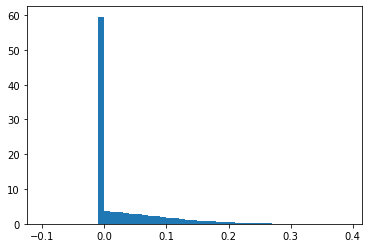

In [9]:
p = plt.hist(ukb_emb.values.ravel(), bins=np.arange(-0.1,0.4,0.01), density=True)

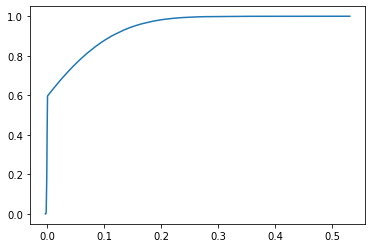

In [10]:
Z = ukb_emb.values.ravel()
N = len(Z)
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)

plt.plot(X2, F2)

In [11]:
X2[int(N*0.59)]

-1.4293296779796793e-05

In [12]:
len(ukb_emb)

21051

In [13]:
ukb_positive = (ukb_emb>0).sum(axis=0)/len(ukb_emb)
ukb_positive = ukb_positive.sort_values(ascending=False)

In [14]:
ukb_positive

dim41     0.911311
dim207    0.905088
dim46     0.847561
dim245    0.839390
dim223    0.833405
            ...   
dim13     0.027552
dim185    0.025842
dim136    0.011923
dim200    0.008408
dim87     0.001473
Length: 256, dtype: float64

In [15]:
ukb_positive[10:50]

dim155    0.756876
dim171    0.755926
dim98     0.729609
dim146    0.724384
dim205    0.716783
dim89     0.710465
dim226    0.706570
dim82     0.706522
dim186    0.687521
dim238    0.676880
dim4      0.676025
dim90     0.666857
dim91     0.664481
dim57     0.664006
dim189    0.656121
dim235    0.655171
dim163    0.653033
dim161    0.648900
dim129    0.637832
dim18     0.637119
dim148    0.632559
dim77     0.623201
dim228    0.622298
dim110    0.620161
dim219    0.618403
dim131    0.617405
dim118    0.615600
dim179    0.614888
dim162    0.612370
dim93     0.611752
dim152    0.611040
dim211    0.610565
dim227    0.610470
dim64     0.608570
dim55     0.608427
dim142    0.604057
dim123    0.600969
dim166    0.594889
dim220    0.593606
dim169    0.587241
dtype: float64

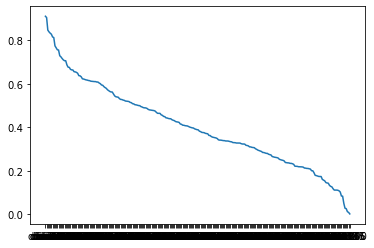

In [16]:
plt.plot(ukb_positive)

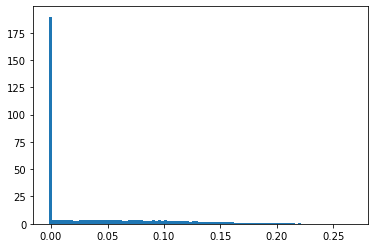

In [17]:
p = plt.hist(ukb_emb.loc[:,"dim83"], bins=100, density=True)

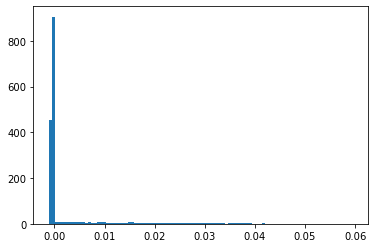

In [18]:
p = plt.hist(ukb_emb.loc[:,"dim65"], bins=100, density=True)

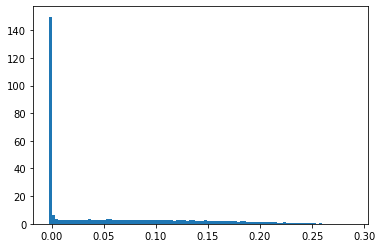

In [19]:
p = plt.hist(ukb_emb.loc[:,"dim188"], bins=100, density=True)

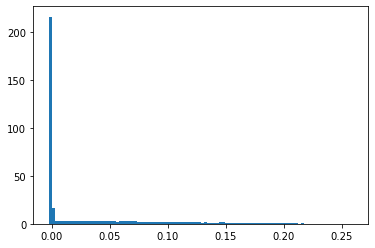

In [20]:
p = plt.hist(ukb_emb.loc[:,"dim10"], bins=100, density=True)

# Schizophrene

In [21]:
norm = schiz_emb.apply(np.linalg.norm, axis=1)
schiz_emb = schiz_emb.div(norm, axis=0)

In [22]:
def compute_umap(df, n_neighbors=15):
    # apply umap
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    visual_embs = reducer.fit_transform(df)
    return visual_embs, reducer

In [23]:
visual_ukb_emb, reducer = compute_umap(ukb_emb, n_neighbors=15)

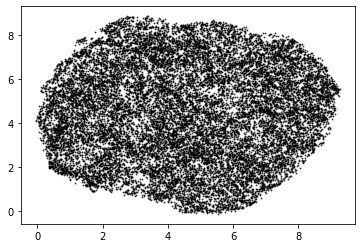

In [24]:
plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=1, alpha=0.6)

In [25]:
visual_schiz_emb = reducer.transform(schiz_emb)

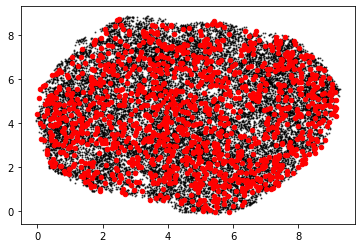

In [26]:
plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=1, alpha=0.6)
plt.scatter(visual_schiz_emb[:,0], visual_schiz_emb[:,1], c='red', s=20, alpha=1)

In [27]:
ukb_positive = (ukb_emb>0).sum(axis=0)/len(ukb_emb)

In [28]:
schiz_order = schiz_emb.copy()
schiz_order.loc["ukb_positive",:] = ukb_positive
schiz_order

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-10171_ses-1,-0.001042,-0.001274,-0.000437,0.095093,0.062588,-0.000252,-0.000415,-0.001230,0.081084,-0.000557,...,-1.497130e-03,-0.001490,-0.000363,-0.001553,-0.000713,-0.001366,-0.000472,-0.000510,0.053474,0.145091
sub-10189_ses-1,-0.000446,-0.001004,0.093041,0.065933,0.026059,-0.000303,0.054587,-0.000675,0.032713,0.058865,...,-3.817308e-04,-0.001116,-0.000687,-0.000460,-0.000442,-0.001247,-0.001291,0.000438,-0.000786,0.018093
sub-10193_ses-1,-0.000421,0.148270,0.054323,0.171969,0.030081,-0.001459,0.172903,0.124882,0.080190,-0.001547,...,-5.771190e-04,0.131858,0.044681,-0.001131,0.080666,-0.000593,0.089060,-0.000550,-0.001276,-0.000430
sub-10206_ses-1,0.038550,-0.000494,0.046425,-0.001530,0.009988,0.143773,-0.001188,-0.000805,-0.001274,0.167756,...,-8.767498e-08,-0.000800,-0.001632,0.138927,-0.000893,-0.000114,-0.001792,0.047914,0.023224,-0.000450
sub-10217_ses-1,-0.001039,-0.000852,-0.000925,0.067936,-0.001590,-0.001144,-0.001078,-0.001937,-0.000876,-0.001071,...,-2.560585e-04,-0.000639,-0.001000,0.001721,-0.001269,-0.000137,-0.000065,-0.001235,0.054971,0.085168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-va110289_ses-v1,-0.001011,0.094466,-0.000668,0.171941,-0.000982,-0.002001,0.130308,0.036325,0.071665,-0.001629,...,2.459850e-02,0.075823,0.115793,-0.001301,0.043361,-0.000319,0.122350,-0.000478,-0.000333,0.036935
sub-ye110322_ses-v1,-0.001385,0.152654,-0.000873,0.121871,0.000968,-0.000498,0.091071,0.102917,0.068969,-0.001543,...,-3.612129e-04,0.103066,0.084418,-0.001312,0.010164,-0.001405,0.115108,-0.000516,-0.000336,0.023177
sub-yh100442_ses-v1,0.009534,-0.001328,0.121079,0.085293,0.071842,-0.001438,0.028378,-0.000936,-0.000289,-0.000441,...,-1.339047e-03,-0.000800,-0.000970,-0.000465,-0.000258,0.010460,-0.000713,-0.000587,-0.000651,0.020896


In [29]:
schiz_order = schiz_order.sort_values(schiz_order.last_valid_index(), ascending=False, axis=1)

In [30]:
schiz_order

,dim41,dim207,dim46,dim245,dim223,dim195,dim153,dim76,dim241,dim191,...,dim233,dim157,dim125,dim69,dim66,dim13,dim185,dim136,dim200,dim87
ID,,,,,,,,,,,,,,,,,,,,,
sub-10171_ses-1,0.265212,0.289171,0.116022,-0.001634,0.069046,0.080698,-0.000069,0.160283,0.042622,-0.000123,...,0.020520,-0.000103,-0.000452,-0.000011,-0.000613,-0.000571,-0.000336,-0.000177,-0.000267,-0.000142
sub-10189_ses-1,0.217205,0.300780,0.038815,-0.001262,0.045723,0.105038,0.006117,0.130957,-0.000471,-0.000097,...,0.016369,0.019743,-0.000230,-0.000055,-0.000381,-0.000336,-0.000404,-0.000180,-0.000296,-0.000153
sub-10193_ses-1,0.107846,0.190344,-0.000415,-0.000364,0.150533,0.118953,0.074894,0.004330,-0.000058,-0.000173,...,-0.000384,-0.000327,-0.000592,0.007347,-0.000390,-0.000025,-0.000156,-0.000140,-0.000189,-0.000093
sub-10206_ses-1,0.025195,-0.000239,-0.000166,-0.000074,-0.000818,0.033210,0.005018,0.134965,-0.000999,0.106753,...,0.043563,0.022856,0.015494,-0.000252,0.029969,-0.000125,-0.000406,-0.000054,-0.000060,-0.000051
sub-10217_ses-1,0.197961,0.272862,0.249872,0.195824,0.078644,0.049543,0.069988,0.073978,0.202108,0.081213,...,-0.001602,-0.001703,-0.001268,-0.001050,-0.001286,-0.001116,-0.001237,-0.000259,-0.000312,-0.000164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-va110289_ses-v1,0.031667,0.148585,0.101201,0.033121,0.077420,-0.000482,-0.000281,-0.001364,0.159453,-0.000919,...,-0.001003,-0.000996,-0.000733,-0.000333,-0.000605,-0.000301,-0.000199,-0.000111,-0.000147,-0.000084
sub-ye110322_ses-v1,0.051568,0.042771,0.002373,0.020009,0.106570,0.087233,-0.000379,-0.000304,0.182922,0.094747,...,-0.001174,-0.001154,-0.001152,-0.000483,-0.000361,-0.000097,-0.000287,-0.000124,-0.000116,-0.000080
sub-yh100442_ses-v1,0.281992,0.369891,0.054342,-0.000337,0.137680,0.167230,0.205109,0.216954,-0.000992,-0.000489,...,0.041995,0.023972,-0.000595,0.017622,-0.001117,-0.000778,-0.000599,-0.000189,-0.000336,-0.000163
